<a href="https://colab.research.google.com/github/JuanRaul23/portafolio-ciencia-de-datos/blob/master/random_forest_sensus2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicción del income del censo
* Recuerda usar el otro dataset de prueba también

## Cargando las librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Cargando los datos

In [3]:
# Nombres de columnas proporcionados
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income'
]

# Cargar los datos desde los archivos
df = pd.read_csv('/content/drive/MyDrive/adult_data.csv', names=column_names)
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [7]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
income                2
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


## Función Value Count

In [9]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [10]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [11]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [12]:
df['native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [13]:
df['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [14]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [15]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [16]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

<Axes: xlabel='income', ylabel='count'>

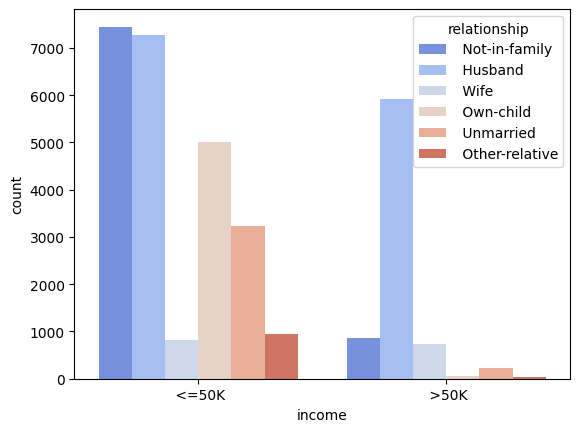

In [17]:
sns.countplot(x='income', hue='relationship', data=df, palette='coolwarm')

In [18]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

## Llenando valores '?'

In [19]:
df['workclass'] = df['workclass'].replace('?', 'Private')
df['occupation'] = df['occupation'].replace('?', 'Prof-specialty')
df['native-country'] = df['native_country'].replace('?', 'United-States')

## Feature Engineering

In [20]:
# education Category
df.education= df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df.education = df.education.replace('HS-grad', 'high school')
df.education = df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
df.education = df.education.replace('Bachelors', 'undergrad')
df.education = df.education.replace('Masters', 'grad')
df.education = df.education.replace('Doctorate', 'doc')

In [21]:
# martial status
df['marital_status']= df['marital_status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
df['marital_status']= df['marital_status'].replace(['Never-married'], 'not-married')
df['marital_status']= df['marital_status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')

In [22]:
# Codificación 'one-hot' para 'income'
df['income'] = df['income'].map({' <=50K': 0, ' >50K': 1})

In [23]:
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,Cuba
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,United-States
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0,Jamaica
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1,United-States
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1,United-States
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1,United-States


In [24]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income             int64
native-country    object
dtype: object

In [25]:
df['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [26]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

## Matriz de correlación y mapa de calor

In [27]:
df.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


<Axes: >

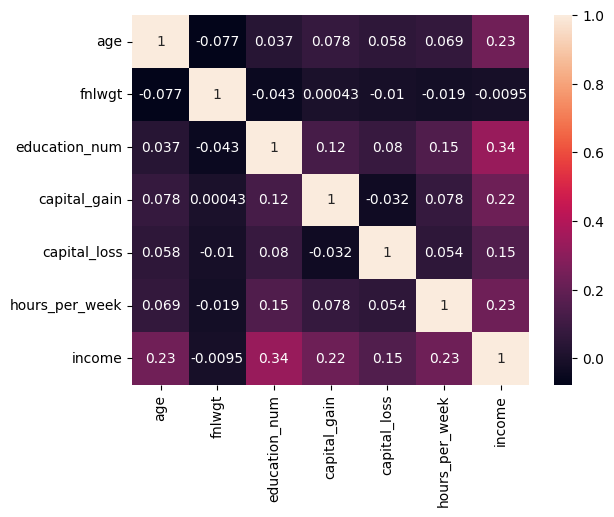

In [28]:
sns.heatmap(df.corr(), annot=True)

## Histograma

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'education_num'}>],
       [<Axes: title={'center': 'capital_gain'}>,
        <Axes: title={'center': 'capital_loss'}>,
        <Axes: title={'center': 'hours_per_week'}>],
       [<Axes: title={'center': 'income'}>, <Axes: >, <Axes: >]],
      dtype=object)

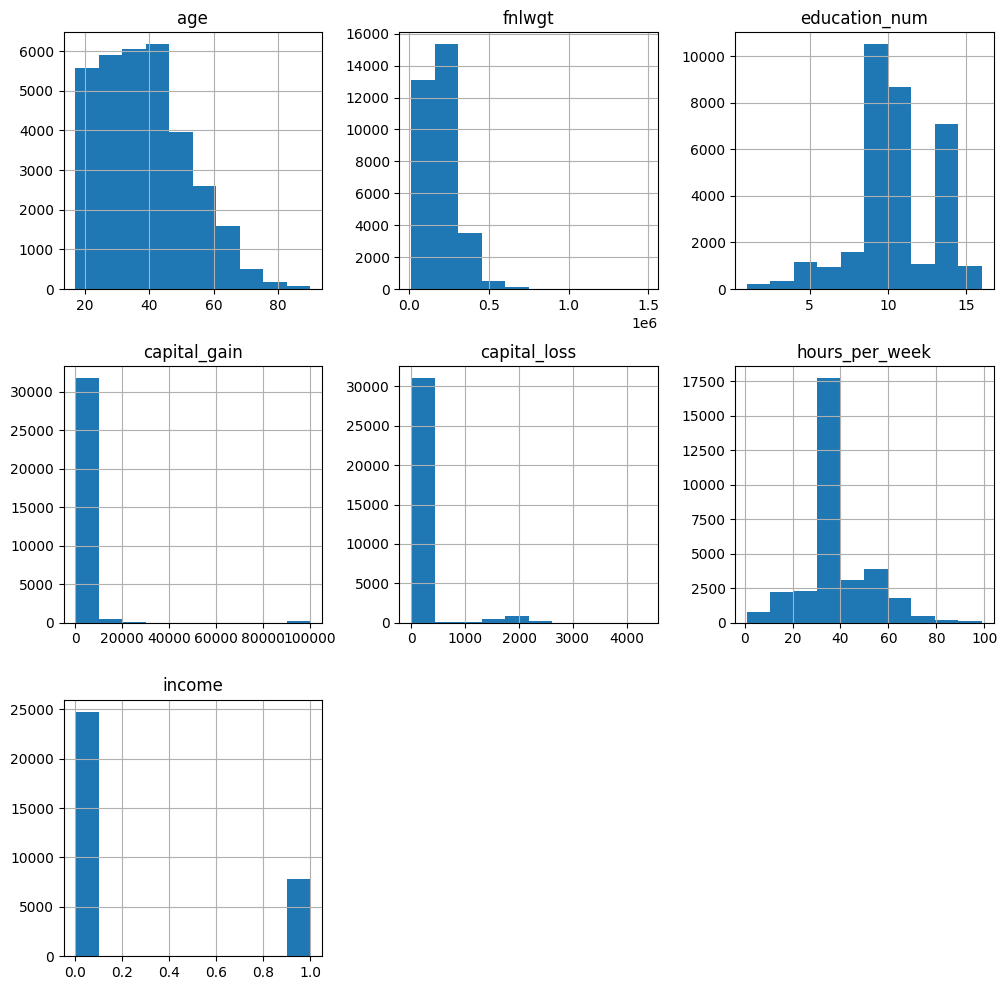

In [29]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False)

## Plotly

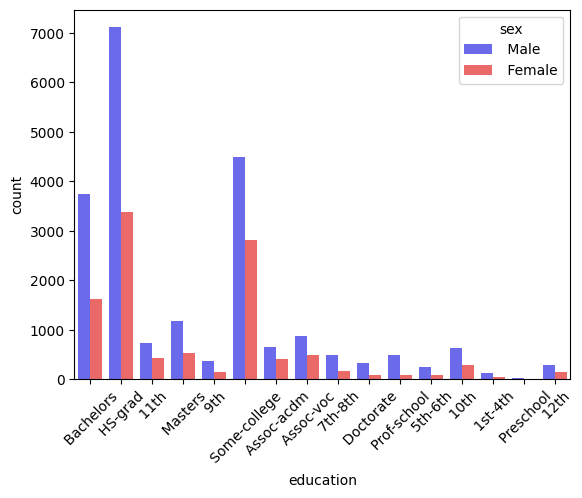

In [31]:
sns.countplot(x='education', hue='sex', data=df, palette='seismic')
plt.xticks(rotation=45)
plt.show()

# Construcción del modelo

In [32]:
X = df.drop(['income'], axis=1)
y = df['income']

## Escalado de características

In [33]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [34]:
df1= df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,native-country
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0,39
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0,39
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0,39
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0,39
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0,5


* LabelEncoder().fit_transform codifica las etiquetas con un valor entre 0 y n_clases-1.

In [35]:
ss = StandardScaler().fit(df1.drop('income', axis=1))

* StandardScaler() es una herramienta que normaliza los datos para que tengan una media de 0 y una desviación estándar de 1, lo cual es a menudo un requisito para muchos algoritmos de machine learning.
* df1.drop('income', axis=1) elimina temporalmente la columna 'income' para que no se incluya en el proceso de escalado.
* fit() calcula los parámetros necesarios (media y desviación estándar para cada característica) para la posterior transformación.

In [36]:
X= ss.transform(df1.drop('income', axis=1))
y= df['income']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [45]:
# Verificando si los datos fueron bien partidos
print(X_train.shape)
print(y_train.shape)

(22792, 15)
(22792,)


# Regresión Logística

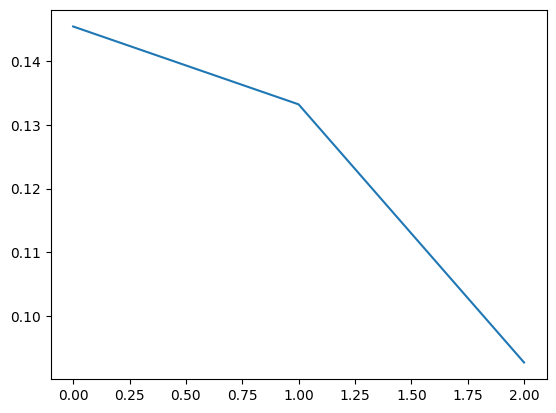

In [50]:
from sklearn.linear_model import LogisticRegression

# n_components = min(n_muestras, n_features)
pca = PCA(n_components=3)
pca.fit(X_train)

ipca = IncrementalPCA(n_components=3, batch_size=10) # crea pequeños bloques (batch) donde los va entrenando poco a poco
ipca.fit(X_train)

plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()

In [51]:
logistic = LogisticRegression(solver='lbfgs')

dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)
logistic.fit(dt_train, y_train)
print("SCORE PCA: {:,.4f}".format(logistic.score(dt_test, y_test)))

dt_train = ipca.transform(X_train)
dt_test = ipca.transform(X_test)
logistic.fit(dt_train, y_train)
print("SCORE IPCA: {:,.4f}".format(logistic.score(dt_test, y_test)))

SCORE PCA: 0.8029
SCORE IPCA: 0.7990


# Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("Accuracy en training: {:,.4f}".format(rfc.score(X_train, y_train)))
print("Accuracy en test: {:,.4f}".format(rfc.score(X_test, y_test)))

Accuracy en training: 1.0000
Accuracy en test: 0.8551


In [40]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [41]:
print(confusion_matrix(y_test, prediction1))

[[6872  525]
 [ 912 1460]]


## Importante sobre matriz de confusión
La función confusion_matrix en scikit-learn organiza los resultados de la siguiente manera:  
[[VN  FP]  
 [FN  VP]]

In [42]:
print(classification_report(y_test, prediction1))
roc_auc = roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])
print('ROC AUC: ', roc_auc)

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7397
           1       0.74      0.62      0.67      2372

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769

ROC AUC:  0.9037602922747269


Presición = $VP / (VP + FP)$  
Recall (sensibilidad) = $VP / (VP + FN)$  
Accuracy (exactitud) = $(VP + VN) / (VP + FP + FN + VN)$  
Especifidad = $VN / (VN + FP)$  

El informe de clasificación que has proporcionado ofrece varios detalles sobre el rendimiento de tu modelo de Random Forest para predecir dos clases de ingresos: '<=50K' (representado como clase 0) y '>50K' (representado como clase 1). Aquí te presento las conclusiones clave basadas en los datos proporcionados:

1. **Precisión por Clase:**
   - **Clase 0 ('<=50K'):** Una precisión de 0.88 sugiere que el modelo es bastante bueno para identificar correctamente los casos donde el ingreso es '<=50K'.
   - **Clase 1 ('>50K'):** Una precisión de 0.75 indica que el modelo es menos preciso al identificar los casos donde el ingreso supera los '50K'.

2. **Recall por Clase:**
   - **Clase 0 ('<=50K'):** Un recall de 0.93 muestra que el modelo es muy eficiente para detectar la mayoría de los casos verdaderos de ingresos '<=50K'.
   - **Clase 1 ('>50K'):** Un recall de 0.61 indica que el modelo tiene un rendimiento moderado en la identificación de casos verdaderos de ingresos '>50K', dejando una cantidad considerable de estos casos sin detectar.

3. **Puntuación F1 por Clase:**
   - **Clase 0 ('<=50K'):** La puntuación F1 de 0.91 es alta, lo que significa un buen equilibrio entre precisión y recall para esta clase.
   - **Clase 1 ('>50K'):** La puntuación F1 de 0.67 es moderada, reflejando un compromiso entre la precisión y el recall para la clase '>50K'.

4. **Métricas Generales:**
   - **Exactitud (Accuracy):** Con una exactitud general del 0.86, el modelo clasifica correctamente el 86% de los casos en total. Esto indica un buen rendimiento general.
   - **Promedio Macro:** El promedio macro (macro avg) de precisión, recall y puntuación F1 (0.81, 0.77, 0.79, respectivamente) considera ambas clases por igual, lo que indica un rendimiento razonablemente bueno y equilibrado del modelo.
   - **Promedio Ponderado:** El promedio ponderado (weighted avg) tiene en cuenta el desbalance entre las clases. Con valores de 0.85 para la precisión y 0.85 para la puntuación F1, muestra que el modelo está manejando bien las proporciones desiguales de las clases en los datos.

5. **Conclusión General:**
   - El modelo tiene un rendimiento más fuerte en la identificación de la clase '<=50K' en comparación con la clase '>50K'. Esto se refleja en las métricas más altas para la clase 0 en términos de precisión, recall y puntuación F1.
   - Hay espacio para mejorar en la identificación de la clase '>50K', especialmente en términos de aumentar el recall.
   - La exactitud general es alta, lo que indica un buen rendimiento general, pero se debe prestar atención a las métricas específicas de la clase para asegurar que el modelo sea equitativo y efectivo para ambas categorías de ingresos.

En resumen, el modelo de Random Forest está desempeñándose bien en general, especialmente en la predicción de ingresos '<=50K', pero podría mejorar en la identificación de ingresos '>50K' para ser más efectivo y equitativo en sus predicciones.

El valor ROC AUC (Area Under the Receiver Operating Characteristic Curve) de 0.9041 es otra métrica importante para evaluar el rendimiento del modelo de Random Forest, especialmente en contextos de clasificación binaria como este. Aquí te explicamos lo que este valor significa en el contexto de este modelo:

1. **ROC AUC en General:**
   - El ROC AUC es una métrica que mide la capacidad de un modelo de clasificación para discriminar entre las clases. En términos simples, mide qué tan bien el modelo puede distinguir entre las dos categorías de ingresos ('<=50K' y '>50K').
   - Un valor ROC AUC de 1.0 representa un modelo perfecto que distingue completamente entre las dos clases. Un valor de 0.5 sugiere un rendimiento no mejor que el azar.

2. **Tu Valor de ROC AUC (0.9041):**
   - Un ROC AUC de aproximadamente 0.904 indica un excelente rendimiento del modelo. Esto significa que tiene una alta capacidad para diferenciar entre las personas con ingresos '<=50K' y aquellas con ingresos '>50K'.
   - En la práctica, este alto valor implica que el modelo, en la mayoría de los casos, asignará una mayor probabilidad de ser '>50K' a los individuos que realmente pertenecen a esa categoría, y una menor probabilidad a los que no.

3. **Interpretación en el Contexto del Modelo:**
   - Este alto valor de ROC AUC complementa las métricas que has proporcionado anteriormente (precisión, recall, F1-score). Mientras que esas métricas evaluaban la capacidad del modelo para clasificar correctamente los casos individuales, el ROC AUC proporciona una visión más amplia de su habilidad para asignar puntuaciones de probabilidad correctas a las observaciones.
   - Este valor sugiere que, en términos de ranking o priorización (por ejemplo, identificar quién es más probable que tenga un ingreso '>50K'), el modelo es muy eficiente.

4. **Consideraciones Adicionales:**
   - Aunque el ROC AUC es alto, es importante considerar esta métrica en conjunto con las otras métricas de rendimiento (como precisión, recall, F1-score) para tener una visión completa del desempeño del modelo. Un ROC AUC alto no necesariamente implica un alto rendimiento en todas las áreas de interés, especialmente en datos desbalanceados.
   - Es útil también considerar la curva ROC en sí misma, que puede proporcionar insights adicionales sobre el trade-off entre la tasa de verdaderos positivos y la tasa de falsos positivos a diferentes umbrales de clasificación.

En conclusión, un ROC AUC de 0.9041 es indicativo de un modelo muy eficaz en términos de distinguir entre las dos categorías de ingresos, complementando las métricas de rendimiento que ya has evaluado.